
# Código para executar regressão logística
![Derrâme](../res/dataset-cover.jpeg)

# Declaração do problema

De acordo com a Organização Mundial da Saúde (OMS) o AVC é a 2ª causa de morte no mundo, responsável por aproximadamente 11% do total de mortes.
Esse conjunto de dados é usado para prever se um paciente provavelmente sofrerá AVC com base nos parâmetros de entrada, como sexo, idade, várias doenças e tabagismo. Cada linha nos dados fornece informações relevantes sobre o paciente.

Entradas: 
- Gênero 
- Idade
- Hipertensão
- Doença cardíaca
- Casado alguma vez
- Tipo de trabalho
- Tipo de residência
- Nível médio de glicose
- Índice de massa corporal
- Fumante

Saídas:
- AVC (1: teve AVC, 0: Não teve AVC)

# IMPORTANDO AS BIBLIOTECAS

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# IMPORTANDO O DATASET

In [3]:

dataset = pd.read_csv('../data/stroke-data.csv')

# EXPLORANDO / VISUALIZANDO DADOS

In [4]:
dataset.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [5]:
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
dataset.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
dataset.duplicated().sum()

0

Text(0.5, 1.0, 'Alvo - Stroke')

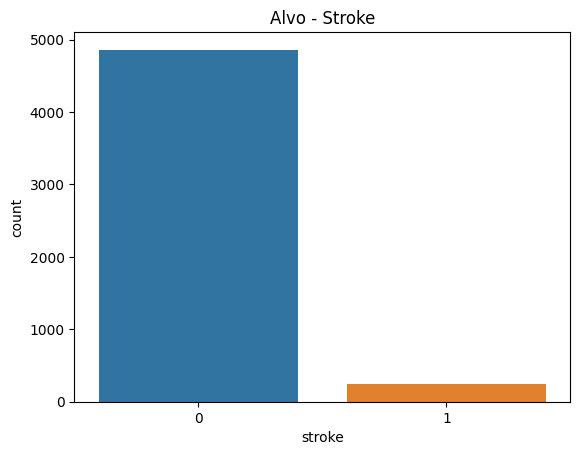

In [9]:
sns.countplot(x=dataset['stroke'])
plt.title('Alvo - Stroke')

In [10]:
stroke    = dataset[dataset['stroke']==1]
no_stroke = dataset[dataset['stroke']==0]


In [11]:
print("Total =", len(dataset))

print("Numero de pessoas que tiveram derrame =", len(stroke))
print("Porcentagem de pessoas que tiveram derrame =", 1.*len(stroke)/len(dataset)*100.0, "%")
 
print("Não tiveram derrame =", len(no_stroke))
print("Porcentagem de pessoas que não tiveram derrame =", 1.*len(no_stroke)/len(dataset)*100.0, "%")

Total = 5110
Numero de pessoas que tiveram derrame = 249
Porcentagem de pessoas que tiveram derrame = 4.87279843444227 %
Não tiveram derrame = 4861
Porcentagem de pessoas que não tiveram derrame = 95.12720156555773 %


In [12]:
genderMale = dataset.query('(gender == "Male" & stroke == 1)')
genderFemale = dataset.query('gender == "Female" & stroke == 1')

print("Chance de ter derrame para o genero masculino =", round(1.*len(genderMale)/len(dataset.query('gender == "Male"'))*100.0, 2), "%")
print("Chance de ter derrame para o genero feminino =", round(1.*len(genderFemale)/len(dataset.query('gender == "Female"'))*100.0,2), "%")


Chance de ter derrame para o genero masculino = 5.11 %
Chance de ter derrame para o genero feminino = 4.71 %


<AxesSubplot: xlabel='gender', ylabel='count'>

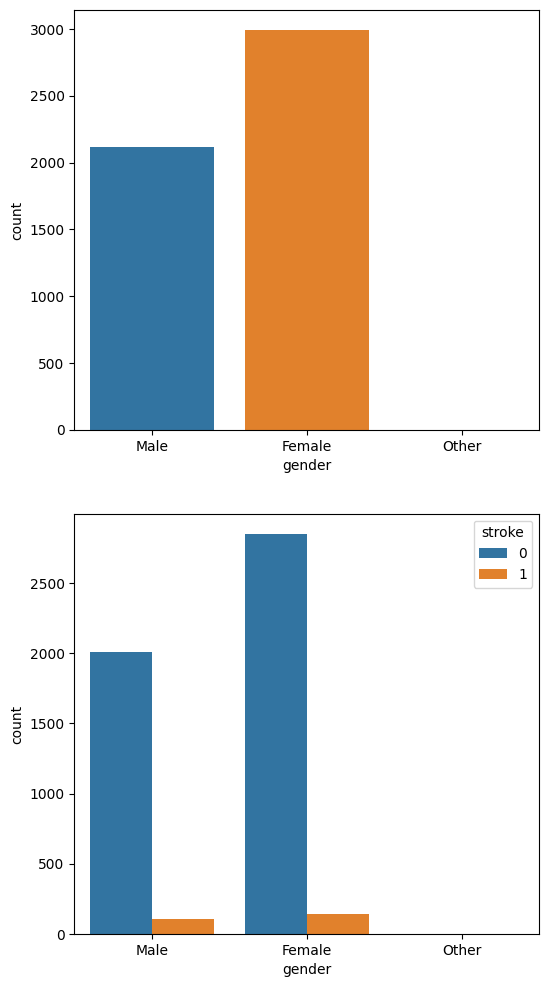

In [13]:
plt.figure(figsize=[6,12])
plt.subplot(211)
sns.countplot(x = 'gender', data = dataset)
plt.subplot(212)
sns.countplot(x = 'gender', hue = 'stroke', data=dataset)

<AxesSubplot: xlabel='work_type', ylabel='count'>

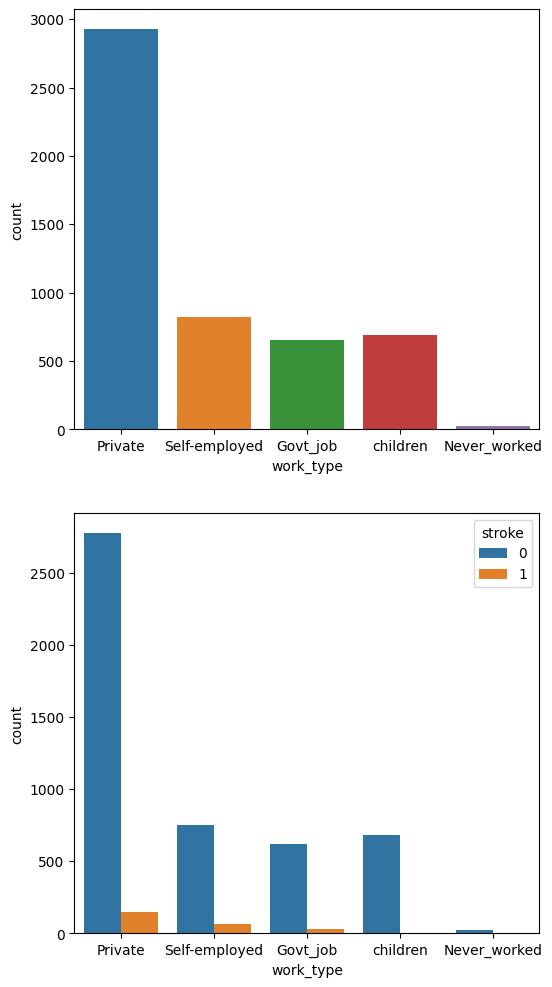

In [14]:
plt.figure(figsize=[6,12])
plt.subplot(211)
sns.countplot(x = 'work_type', data = dataset)
plt.subplot(212)
sns.countplot(x = 'work_type', hue = 'stroke', data=dataset)

<AxesSubplot: xlabel='Residence_type', ylabel='count'>

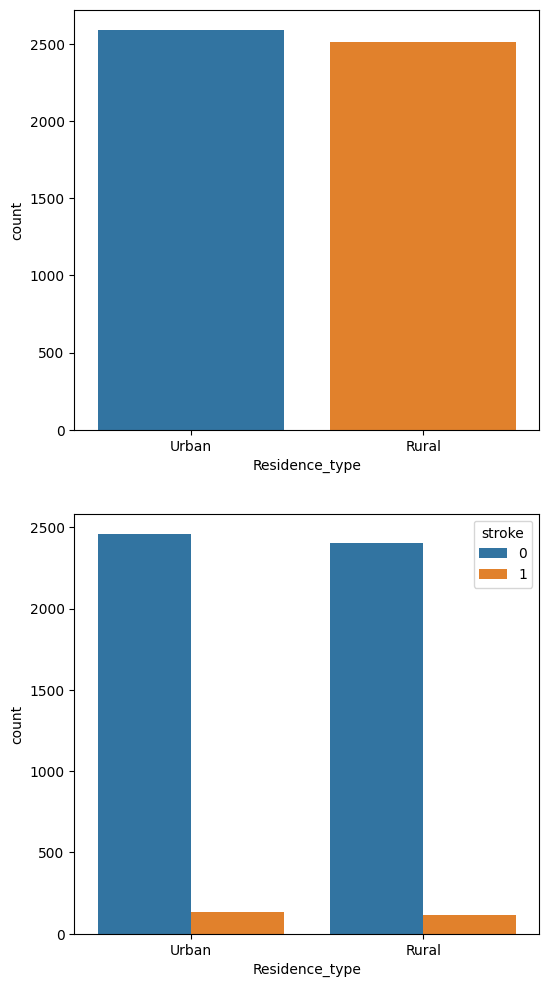

In [15]:
plt.figure(figsize=[6,12])
plt.subplot(211)
sns.countplot(x = 'Residence_type', data = dataset)
plt.subplot(212)
sns.countplot(x = 'Residence_type', hue = 'stroke', data=dataset)

<AxesSubplot: xlabel='smoking_status', ylabel='count'>

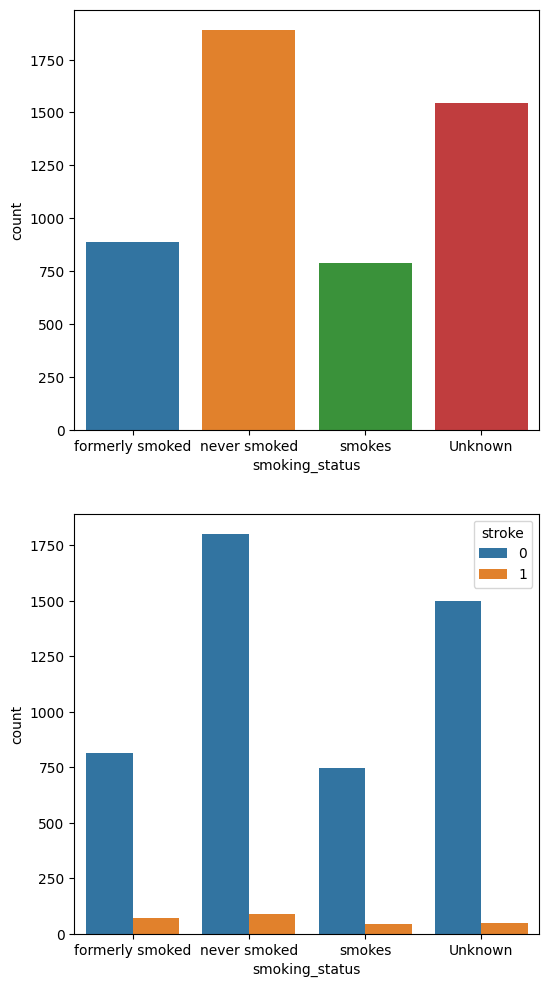

In [16]:
plt.figure(figsize=[6,12])
plt.subplot(211)
sns.countplot(x = 'smoking_status', data = dataset)
plt.subplot(212)
sns.countplot(x = 'smoking_status', hue = 'stroke', data=dataset)

<AxesSubplot: xlabel='ever_married', ylabel='count'>

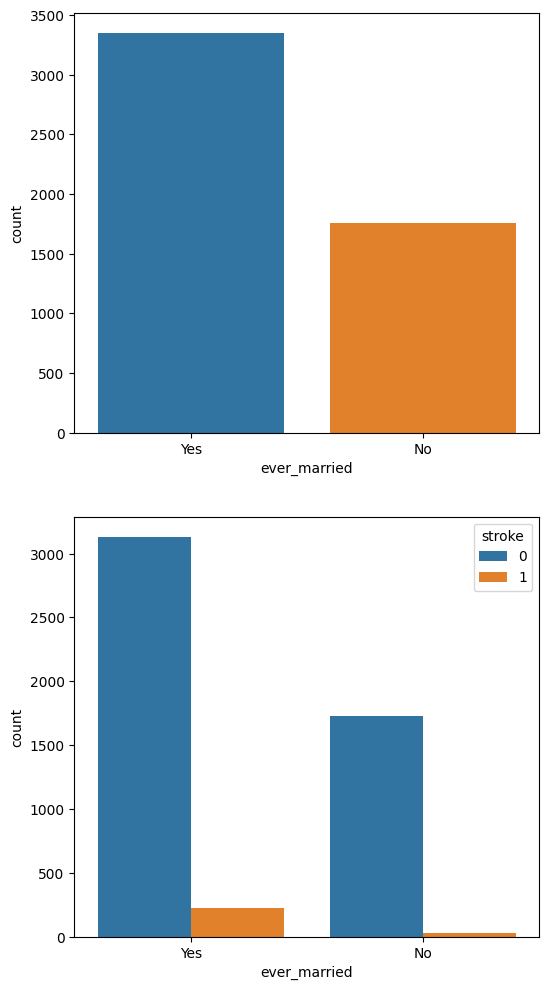

In [17]:
plt.figure(figsize=[6,12])
plt.subplot(211)
sns.countplot(x = 'ever_married', data = dataset)
plt.subplot(212)
sns.countplot(x = 'ever_married', hue = 'stroke', data=dataset)

<AxesSubplot: xlabel='ever_married', ylabel='count'>

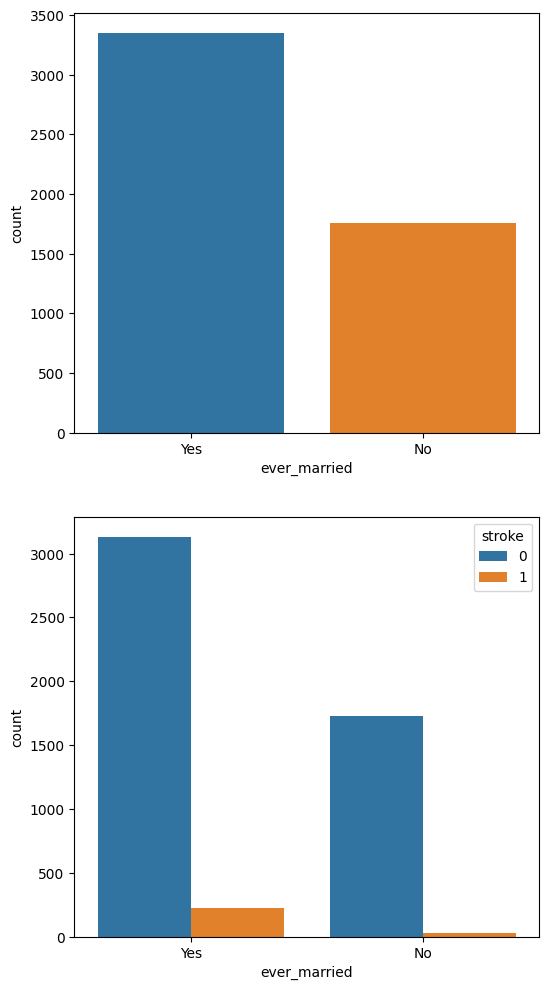

In [18]:
plt.figure(figsize=[6,12])
plt.subplot(211)
sns.countplot(x = 'ever_married', data = dataset)
plt.subplot(212)
sns.countplot(x = 'ever_married', hue = 'stroke', data=dataset)

/tmp/ipykernel_14510/4155930503.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot= True)


<AxesSubplot: >

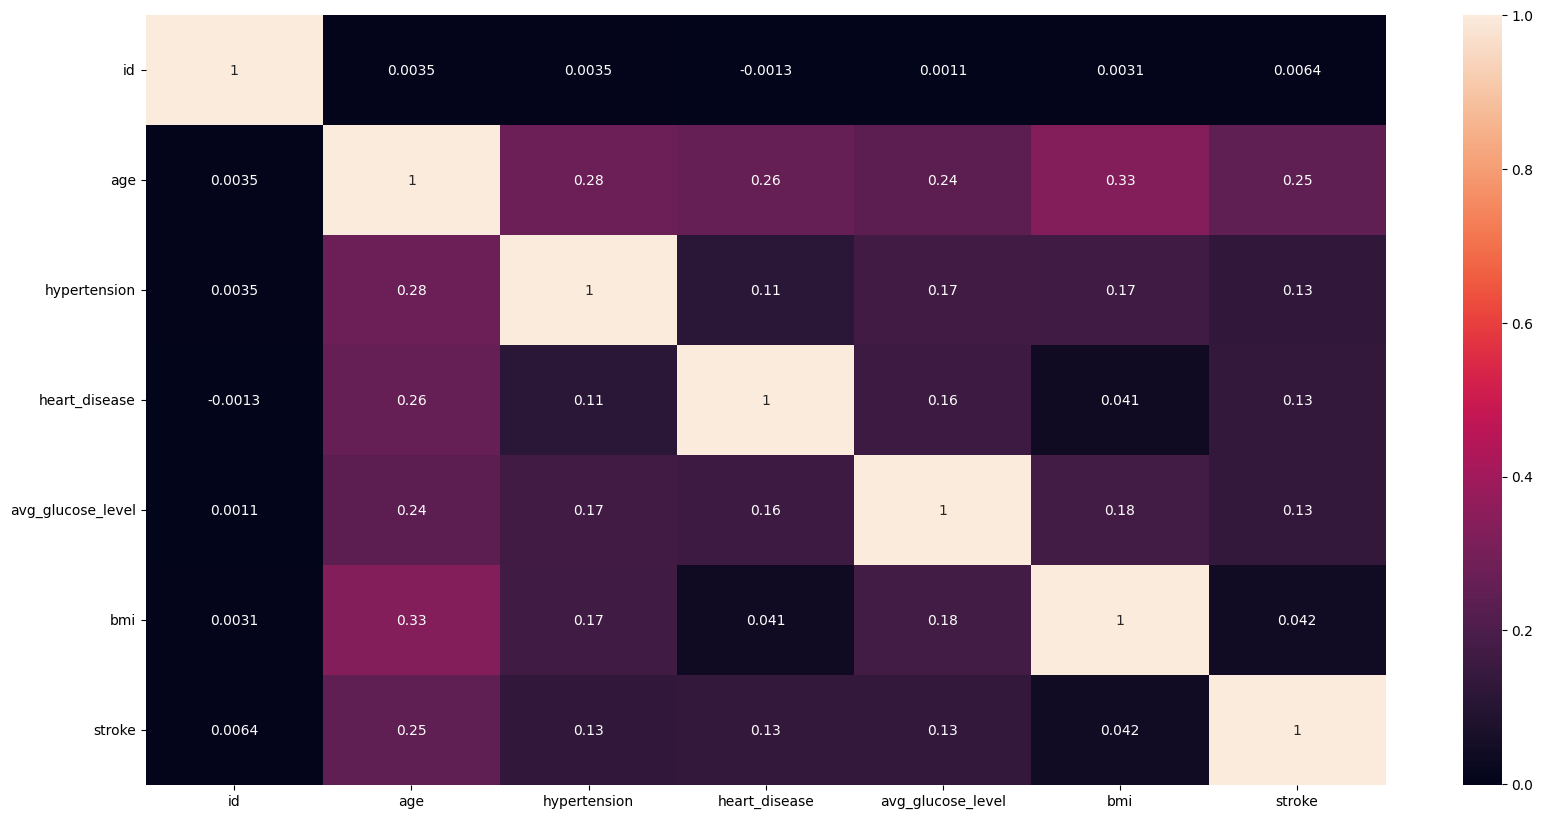

In [19]:
plt.figure(figsize=(20,10))
sns.heatmap(dataset.corr(), annot= True)

<AxesSubplot: xlabel='bmi', ylabel='gender'>

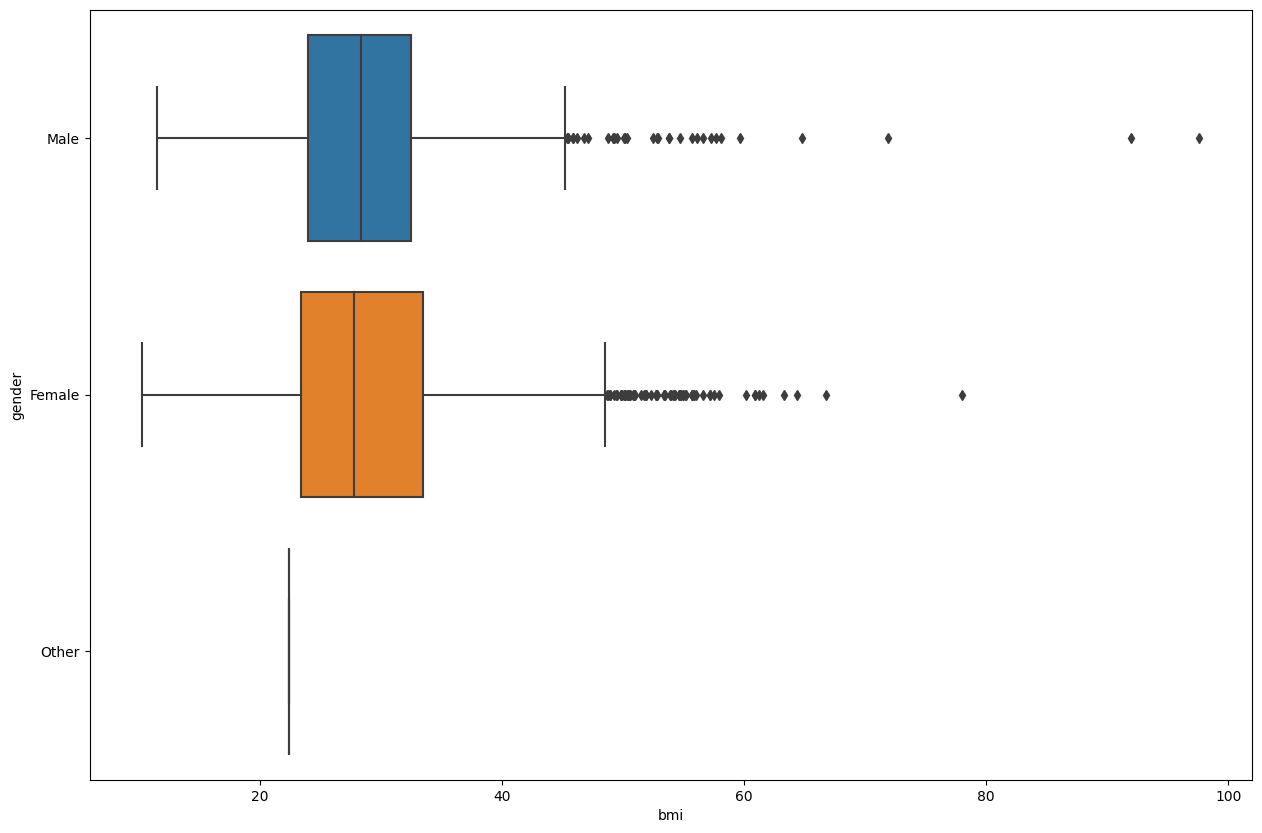

In [20]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='bmi', y='gender',data=dataset)


<AxesSubplot: >

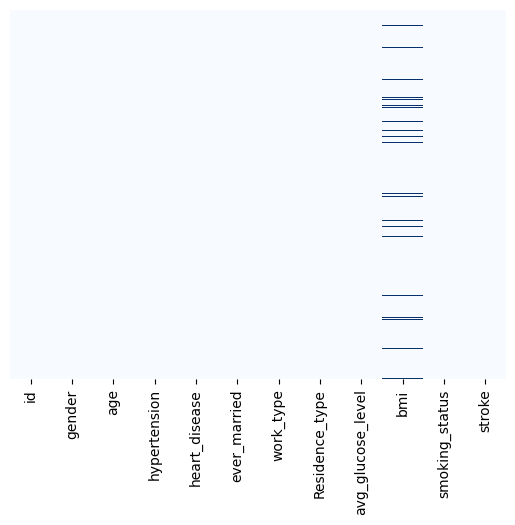

In [21]:
sns.heatmap(dataset.isnull(), yticklabels = False, cbar = False, cmap="Blues")


In [22]:
from statistics import median
maleBmi = median(dataset.query('(gender == "Male")')['bmi'])
femaleBmi = median(dataset.query('(gender == "Female")')['bmi'])
print(f'mediana de bmi para genero masculino {maleBmi}')
print(f'mediana de bmi para genero feminino {femaleBmi}')

mediana de bmi para genero masculino 30.7
mediana de bmi para genero feminino 21.45


# PREPARANDO OS DADOS

In [23]:
def fill_bmi(data):
    bmi = data[0]
    gender = data[1]

    if pd.isnull(bmi):
        if gender == 'Male': 
            return maleBmi
        else:
            return femaleBmi
    else:
        return bmi
        

In [24]:
dataset['bmi'] = dataset[['bmi','gender']].apply(fill_bmi,axis=1)

<AxesSubplot: >

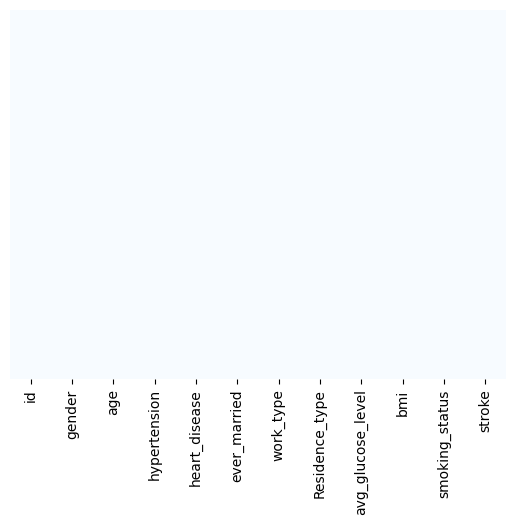

In [25]:
sns.heatmap(dataset.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [26]:
dataset.drop(['id'], axis=1, inplace=True)


In [27]:
ever_married = pd.get_dummies(dataset['ever_married'], drop_first = True)
residence_type = pd.get_dummies(dataset['Residence_type'], drop_first = True)
gender = pd.get_dummies(dataset['Residence_type'], drop_first = True)
work_type = (dataset['work_type'].str.strip('[]')
                     .str.get_dummies(', ')
                     .rename(columns=lambda x: x.strip('"')))
smoking_status = (dataset['smoking_status'].str.strip('[]')
                     .str.get_dummies(', ')
                     .rename(columns=lambda x: x.strip('"')))                     
dataset.drop(['ever_married', 'Residence_type', 'gender', 'work_type', 'smoking_status'], axis=1, inplace=True)

dataset = pd.concat([dataset, ever_married, residence_type, gender, work_type, smoking_status], axis=1)
dataset = dataset.rename(columns={'Yes':'ever_married', 'Urban': 'residence_type', 'Male':'gender'})

In [28]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                5110 non-null   float64
 1   hypertension       5110 non-null   int64  
 2   heart_disease      5110 non-null   int64  
 3   avg_glucose_level  5110 non-null   float64
 4   bmi                5110 non-null   float64
 5   stroke             5110 non-null   int64  
 6   ever_married       5110 non-null   uint8  
 7   residence_type     5110 non-null   uint8  
 8   residence_type     5110 non-null   uint8  
 9   Govt_job           5110 non-null   int64  
 10  Never_worked       5110 non-null   int64  
 11  Private            5110 non-null   int64  
 12  Self-employed      5110 non-null   int64  
 13  children           5110 non-null   int64  
 14  Unknown            5110 non-null   int64  
 15  formerly smoked    5110 non-null   int64  
 16  never smoked       5110 

<AxesSubplot: >

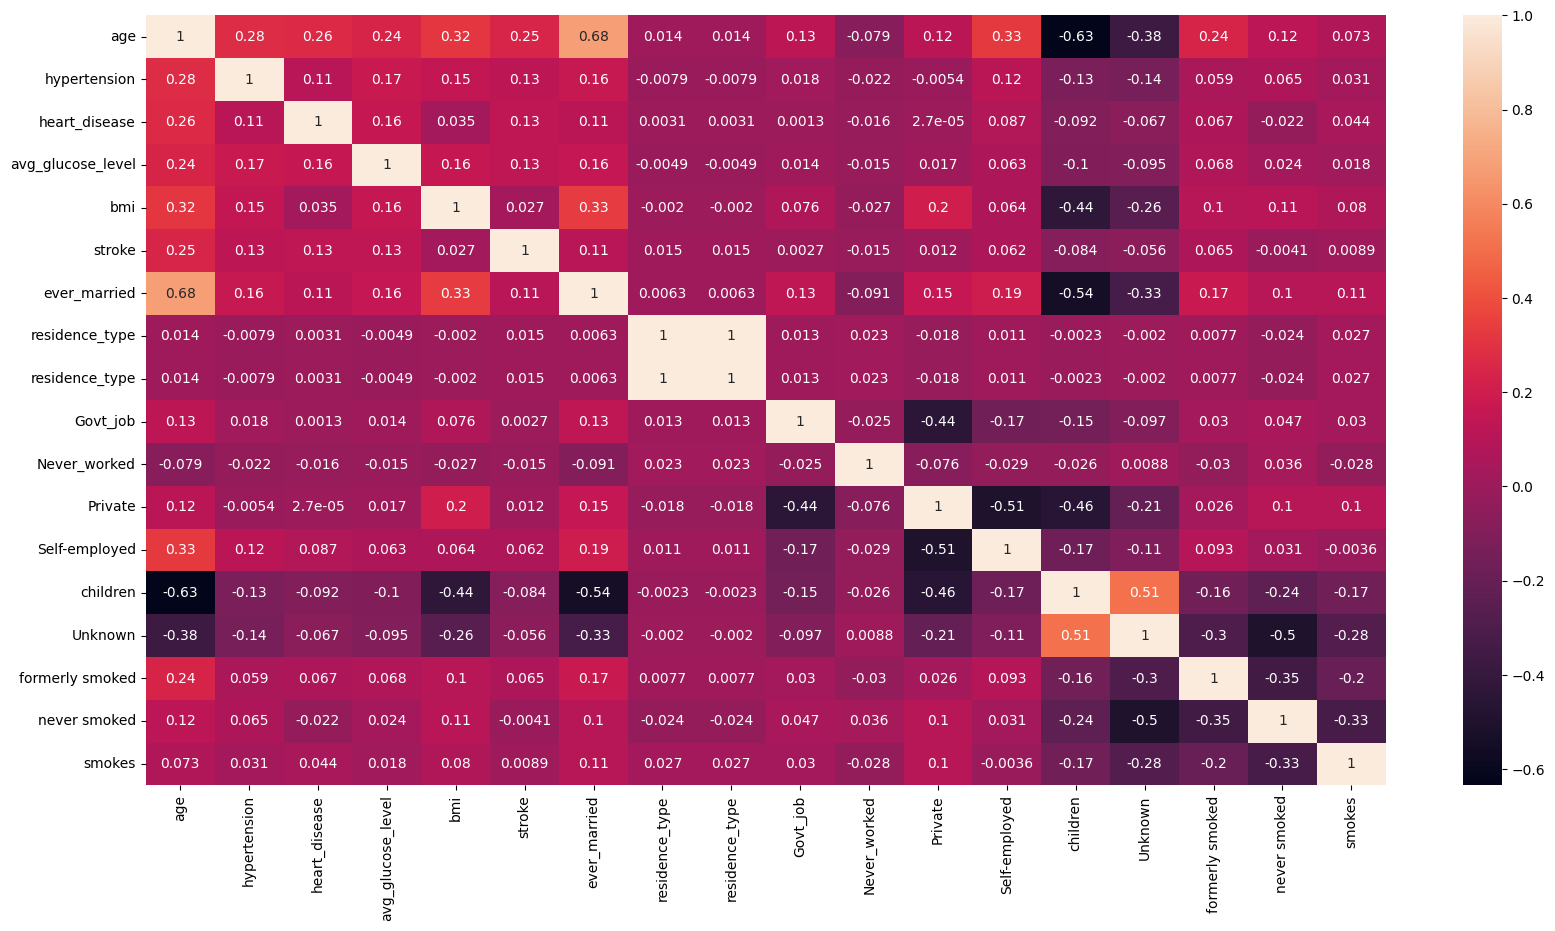

In [29]:
plt.figure(figsize=(20,10))
sns.heatmap(dataset.corr(), annot= True)

In [30]:
X = dataset.drop('stroke',axis=1).values
y = dataset['stroke'].values

In [31]:
# Aplicar técnica de subamostragem com RandomUnderSampler

from imblearn.under_sampling import RandomUnderSampler

oversample = RandomUnderSampler()
X,y=oversample.fit_resample(X,y)

<AxesSubplot: ylabel='count'>

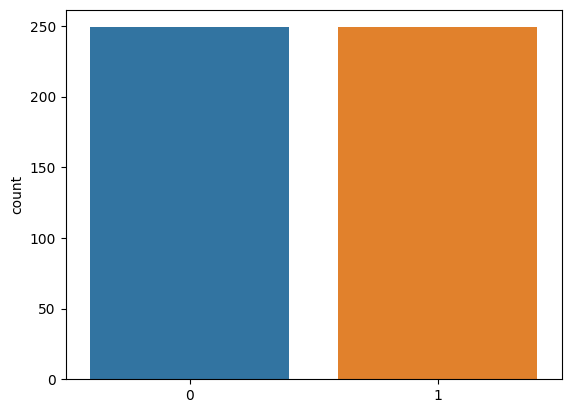

In [32]:
sns.countplot(x=y)

# TREINAMENTO DO MODELO

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
X_test

array([[78.,  0.,  0., ...,  1.,  0.,  0.],
       [20.,  0.,  0., ...,  0.,  1.,  0.],
       [78.,  0.,  0., ...,  0.,  1.,  0.],
       ...,
       [ 2.,  0.,  0., ...,  0.,  0.,  0.],
       [52.,  0.,  0., ...,  0.,  1.,  0.],
       [81.,  0.,  0., ...,  1.,  0.,  0.]])

In [35]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

# TESTANDO O MODELO

In [36]:
y_predict_test = classifier.predict(X_test)
y_predict_test

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1])

# VISUALIZANDO OS DATASETS DE TESTE

<AxesSubplot: >

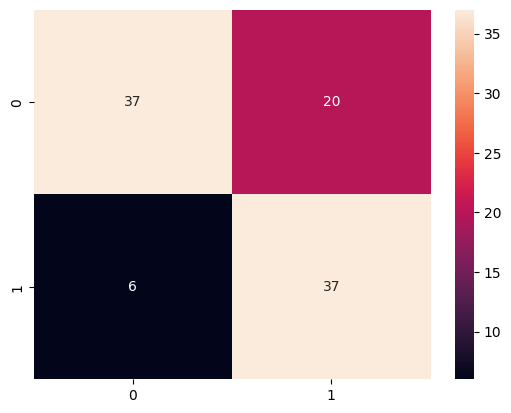

In [37]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, fmt="d")

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.86      0.65      0.74        57
           1       0.65      0.86      0.74        43

    accuracy                           0.74       100
   macro avg       0.75      0.75      0.74       100
weighted avg       0.77      0.74      0.74       100

